In [1]:
import numpy as np
import pylab as plt

In [2]:
def derivative(x,y):
    return(-y/4)

In [3]:
def solution_function(x):
    return(np.exp(-x/4))

In [4]:
def y1_prime(x,y1,y2):
    return(y2)

In [5]:
def y2_prime(x,y1,y2):
    return(-y1)

In [6]:
def second_solution_function(x):
    return(np.cos(x))

In [7]:
def euler_solver(y0,x):
    y = np.zeros([x.shape[0],1])    
    y[0,0] = y0
    for i in range (1,x.shape[0]):
        y[i,0] = y[i-1,0] + (x[i,0]-x[i-1,0])*derivative(x[i-1,0],y[i-1,0])
    return y

In [8]:
def leap_frog_solver(y0,x):
    y = np.zeros([x.shape[0],1])    
    y[0,0] = y0
    y[1,0] = y0 + (x[1,0]-x[0,0])*derivative(x[0,0],y0)
    for i in range (2,x.shape[0]):
        y[i,0] = y[i-2,0] + (x[i,0]-x[i-2,0])*derivative(x[i-1,0],y[i-1,0])
    return y

In [9]:
def runge_kutta_4_solver(y0,x):
    y = np.zeros([x.shape[0],1])    
    y[0,0] = y0
    for i in range (1,x.shape[0]):
        h = x[i,0]-x[i-1,0]
        k1 = h*derivative(x[i-1,0],y[i-1,0])
        k2 = h*derivative(x[i-1,0]+h/2,y[i-1,0]+k1/2)
        k3 = h*derivative(x[i-1,0]+h/2,y[i-1,0]+k2/2)
        k4 = h*derivative(x[i-1,0]+h,y[i-1,0]+k3)
        y[i,0] = y[i-1,0] + (k1+2*k2+2*k3+k4)/6
    return y

In [10]:
def second_order_runge_kutta_4_solver(y10,y20,x):
    y1 = np.zeros([x.shape[0],1])
    y2 = np.zeros([x.shape[0],1])
    y1[0,0] = y10
    y2[0,0] = y20
    for i in range (1,x.shape[0]):
        h = x[i,0]-x[i-1,0]
        k11 = h*y1_prime(x[i-1,0],y1[i-1,0],y2[i-1,0])
        k12 = h*y2_prime(x[i-1,0],y1[i-1,0],y2[i-1,0])
        k21 = h*y1_prime(x[i-1,0]+h/2,y1[i-1,0]+k11/2,y2[i-1,0]+k12/2)
        k22 = h*y2_prime(x[i-1,0]+h/2,y1[i-1,0]+k11/2,y2[i-1,0]+k12/2)
        k31 = h*y1_prime(x[i-1,0]+h/2,y1[i-1,0]+k21/2,y2[i-1,0]+k22/2)
        k32 = h*y2_prime(x[i-1,0]+h/2,y1[i-1,0]+k21/2,y2[i-1,0]+k22/2)
        k41 = h*y1_prime(x[i-1,0]+h,y1[i-1,0]+k31,y2[i-1,0]+k32)
        k42 = h*y2_prime(x[i-1,0]+h,y1[i-1,0]+k31,y2[i-1,0]+k32)
        y1[i,0] = y1[i-1,0] + (k11+2*k21+2*k31+k41)/6
        y2[i,0] = y2[i-1,0] + (k12+2*k22+2*k32+k42)/6
    return(y1,y2)

In [11]:
y_0 = 1
x_inf = 0
x_sup = 4
n = 20

In [12]:
x = np.transpose(np.array([np.linspace(x_inf,x_sup,n)]))
y_euler = euler_solver(y_0,x)
y_lf = leap_frog_solver(y_0,x)
y_rk4 = runge_kutta_4_solver(y_0,x)
y_sol = solution_function(x)

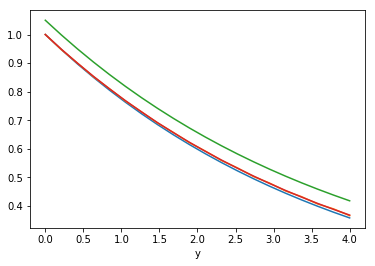

In [17]:
fig1, ax1 = plt.subplots()
ax1.plot(x,y_euler)
ax1.plot(x,y_lf)
ax1.plot(x,y_rk4+0.05)
ax1.plot(x,y_sol)
plt.xlabel(r'x')
plt.xlabel(r'y')
plt.show()
plt.close()

In [14]:
y10 = 1
y20 = 0

In [15]:
y_so_rk4, y_prime_so_rk4 = second_order_runge_kutta_4_solver(y10,y20,x)
y_so_sol = second_solution_function(x)

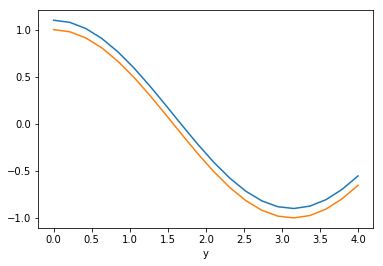

In [16]:
fig2, ax2 = plt.subplots()
ax2.plot(x,y_so_rk4+0.1)
ax2.plot(x,y_so_sol)
plt.xlabel(r'x')
plt.xlabel(r'y')
plt.show()
plt.close()